# Flexible Mixture Modeling

Finite mixture models are a popular method for modelling unobserved heterogeneity or for approx- imating general distribution functions. 

In [1]:
 library("flexmix")
library(ggplot2)
library(tidyr)

Loading required package: lattice



In [2]:
data("whiskey")

In [3]:
set.seed(1802)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Joining, by = "Brand"



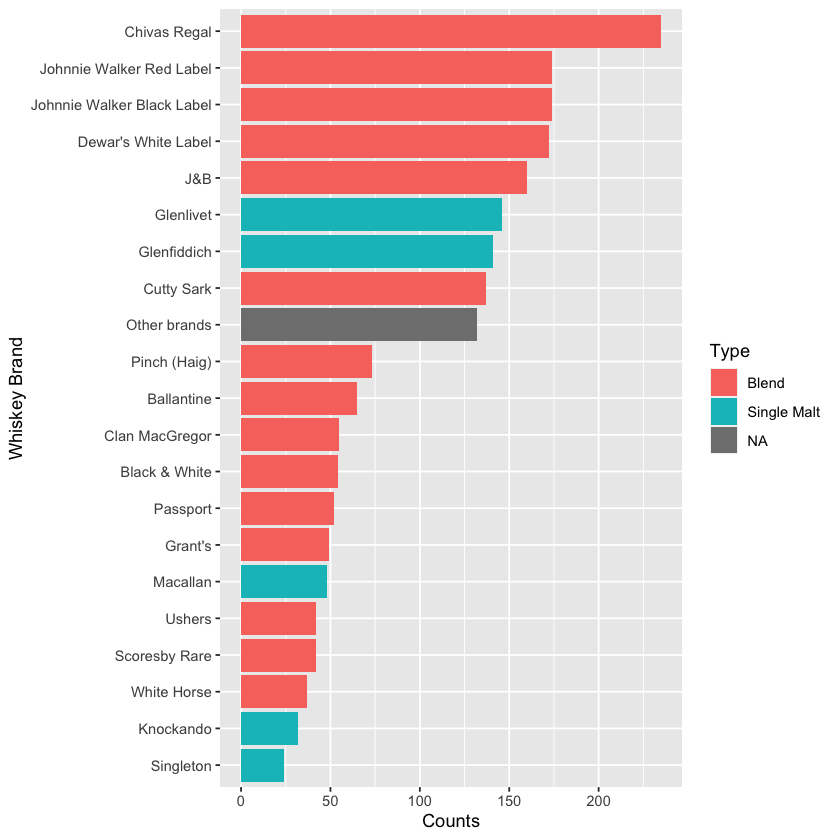

In [4]:
library(dplyr)
c <- colSums(whiskey$Incidence)
d1 <- data.frame(Brand=names(c),counts=c,row.names = NULL) 
d1 <- d1 %>% left_join(whiskey_brands) %>% arrange(-counts)
ggplot(d1,aes(reorder(Brand,counts),counts,fill=Type))+geom_bar(stat='identity')+coord_flip()+labs(y='Counts',x ='Whiskey Brand')

In [5]:
wh_mix <- stepFlexmix(Incidence ~ 1,  weights = ~ Freq, data = whiskey,  model = FLXMCmvbinary(truncated = TRUE),  control = list(minprior = 0.005),  k = 1:7, nrep = 3)


1 : * * *
2 : * * *
3 : * * *
4 : * * *
5 : * * *
6 : * * *
7 : * * *


In [6]:
BIC(wh_mix) 

1        2        3        4        5        6        7 
27737.09 26393.03 26120.21 25815.62 25811.71 25882.77 25963.07

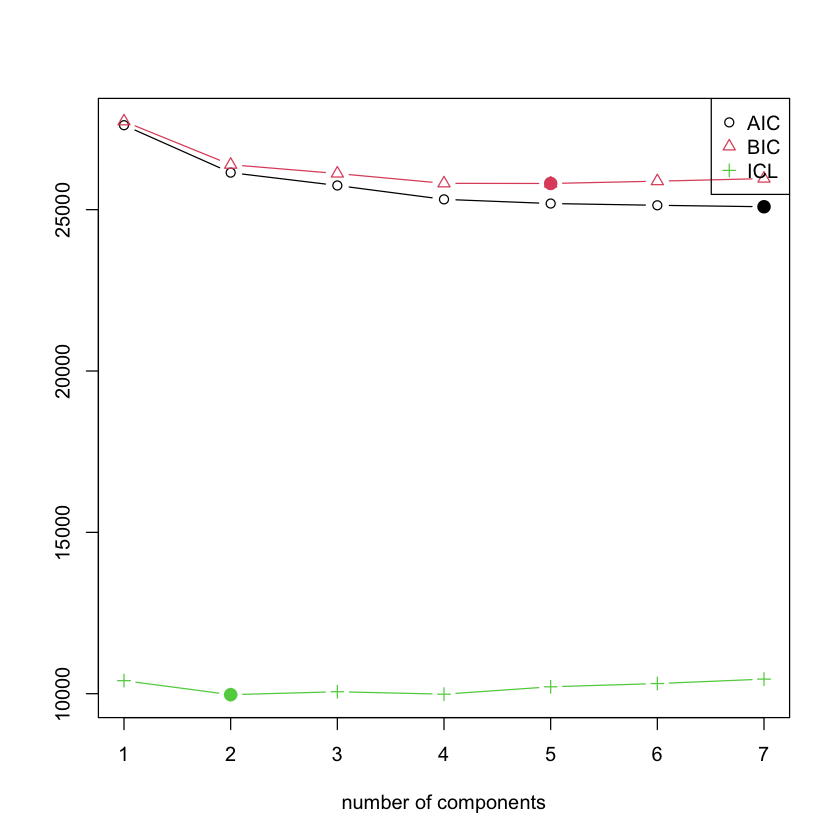

In [7]:
plot(wh_mix)

In [8]:
wh_best <- getModel(wh_mix, "BIC") 
wh_best


Call:
stepFlexmix(Incidence ~ 1, weights = ~Freq, data = whiskey, model = FLXMCmvbinary(truncated = TRUE), 
    control = list(minprior = 0.005), k = 5, nrep = 3)

Cluster sizes:
  1   2   3   4   5 
 24 260 165 980 789 

convergence after 90 iterations

In [9]:
prior(wh_best)

[1] 0.01075074 0.14007619 0.08507556 0.44481428 0.31928324

In [10]:
parameters(wh_best, component=4:5)[1:2,]

,Comp.4,Comp.5
center.Singleton,2.434324e-13,0.004070536
center.Knockando,1.399148e-20,0.001987571


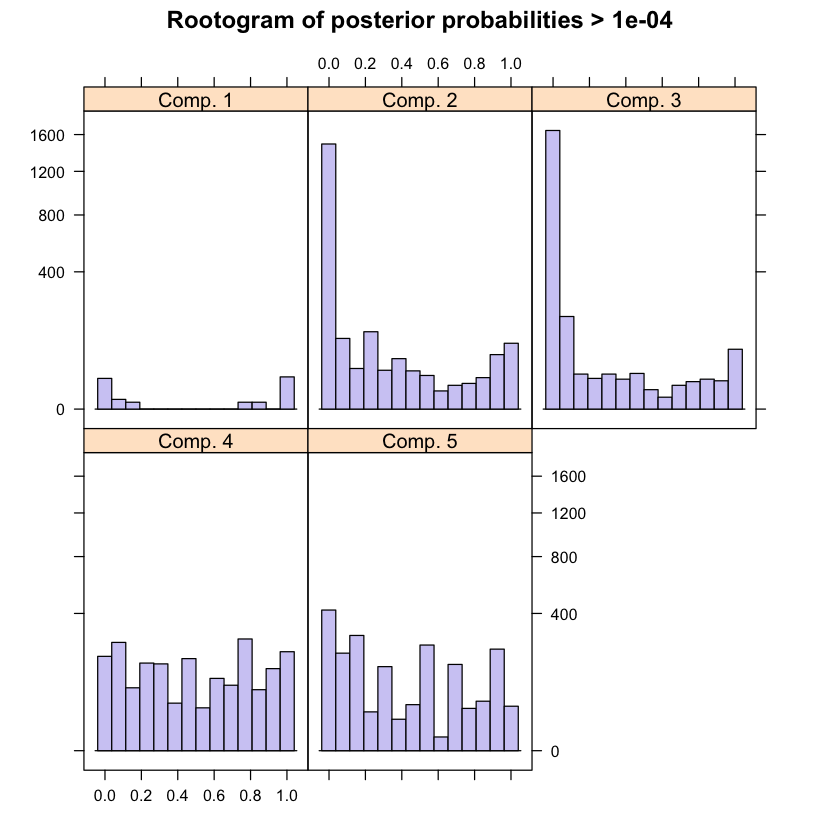

In [11]:
plot(wh_best)

# Productivity of PhD students

In [12]:
data("bioChemists") 

In [13]:
#bioChemists

In [14]:
Model1 <- FLXMRglm(family = "poisson")

In [15]:
ff_1 <- stepFlexmix(art ~ ., data = bioChemists, k = 1:3, model = Model1)

1 : * * *
2 : * * *
3 : * * *


In [16]:
ff_1 <- getModel(ff_1, "BIC")
ff_1


Call:
stepFlexmix(art ~ ., data = bioChemists, model = Model1, k = 2)

Cluster sizes:
  1   2 
746 169 

convergence after 66 iterations

In [17]:
#wh_best <- getModel(ff_1,'BIC') 
#print(wh_best)
wh_best.prior <- prior(ff_1)
wh_best.prior

[1] 0.7384798 0.2615202

In [18]:
wh_best.param <- parameters(ff_1)
wh_best.param

,Comp.1,Comp.2
coef.(Intercept),-0.52952747,1.17367580
coef.femWomen,-0.13948254,-0.29938322
coef.marMarried,0.25284079,0.08952669
coef.kid5,-0.21295970,-0.17944289
coef.phd,0.09409480,-0.02740488
coef.ment,0.02550584,0.03194020


In [19]:
Model2 <- FLXMRglmfix(family = "poisson", fixed = ~ kid5 + mar + ment)

In [20]:
ff_2 <- flexmix(art ~ fem + phd, data = bioChemists,  cluster = posterior(ff_1), model = Model2)

In [21]:
c(BIC(ff_1), BIC(ff_2))

[1] 3210.813 3192.834

In [22]:
summary(refit(ff_2)) 

$Comp.1
              Estimate Std. Error z value  Pr(>|z|)    
kid5        -0.2011663  0.0523722 -3.8411 0.0001225 ***
marMarried   0.1760452  0.0800182  2.2001 0.0278024 *  
ment         0.0271490  0.0027437  9.8949 < 2.2e-16 ***
(Intercept) -0.4226571  0.2047121 -2.0646 0.0389569 *  
femWomen    -0.1511766  0.0983393 -1.5373 0.1242210    
phd          0.0765328  0.0477961  1.6012 0.1093250    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

$Comp.2
              Estimate Std. Error z value  Pr(>|z|)    
kid5        -0.2011663  0.0523722 -3.8411 0.0001225 ***
marMarried   0.1760452  0.0800182  2.2001 0.0278024 *  
ment         0.0271490  0.0027437  9.8949 < 2.2e-16 ***
(Intercept)  1.1867827  0.1905677  6.2276 4.736e-10 ***
femWomen    -0.3174689  0.0962252 -3.2992 0.0009695 ***
phd         -0.0180005  0.0478836 -0.3759 0.7069745    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [23]:
Model3 <- FLXMRglmfix(family = "poisson", fixed = ~ kid5 + mar + ment)

In [24]:
ff_3 <- flexmix(art ~ fem, data = bioChemists, cluster = posterior(ff_2),  model = Model3) 

In [25]:
c(BIC(ff_2), BIC(ff_3))

[1] 3192.834 3182.077

In [26]:
parameters(ff_4)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'object' in selecting a method for function 'parameters': object 'ff_4' not found


In [ ]:
summary(refit(ff_4), which = "concomitant") 

In [ ]:
plot((ff_4))

In [ ]:
BIC(ff_4)

In [ ]:
Model5 <- FLXMRglmfix(family = "poisson", fixed = ~ kid5 + ment + fem)

In [ ]:
ff_5 <- flexmix(art ~ 1, data = bioChemists, cluster = posterior(ff_2),  model = Model5)

In [ ]:
BIC(ff_5)

In [ ]:
print(plot(refit(ff_5), box.ratio = 1))

In [ ]:
table(clusters(ff_5))

# Mixtures of regressions


In [ ]:
data("patent")

In [ ]:
plot(Patents~lgRD,patent)

In [ ]:
pat_mix <- flexmix(Patents ~ lgRD, k = 3, data = patent, model = FLXMRglm(family = "poisson"), concomitant = FLXPmultinom(~RDS))

In [ ]:
plot(pat_mix, mark = 3)


In [ ]:
plot(refit(pat_mix), bycluster = FALSE)

In [ ]:
Components <- factor(clusters(pat_mix))
xyplot(Patents~lgRD,groups = Components,patent,type=c('p','spline'))

In [ ]:
Model_2 <- FLXMRglmfix(family = "poisson", nested = list(k = c(1,2), formula = ~lgRD))

In [ ]:
Post_1 <- posterior(pat_mix)[,c(2,1,3)]

In [ ]:
plot(Post_1)

In [ ]:
pat_mix2 <- flexmix(Patents ~ 1, concomitant = FLXPmultinom(~RDS), data = patent, cluster = Post_1, model = Model_2)

In [ ]:
c(M_1 = BIC(pat_mix), M_2 = BIC(pat_mix2))

In [ ]:
summary(refit(pat_mix))


# Seizure data

In [27]:
data("seizure", package = "flexmix")

In [28]:
seizMix <- stepFlexmix(Seizures ~ Treatment * log(Day), data = seizure,  k = 2, nrep = 3, model = FLXMRglm(family = "poisson",  offset = log(seizure$Hours)))

2 : * * *


In [29]:
summary(seizMix)


Call:
stepFlexmix(Seizures ~ Treatment * log(Day), data = seizure, 
    model = FLXMRglm(family = "poisson", offset = log(seizure$Hours)), 
    k = 2, nrep = 3)

       prior size post>0 ratio
Comp.1 0.276   37    101 0.366
Comp.2 0.724  103    115 0.896

'log Lik.' -376.1762 (df=9)
AIC: 770.3525   BIC: 796.8273 


In [30]:
summary(refit(seizMix)) 

$Comp.1
                      Estimate Std. Error z value  Pr(>|z|)    
(Intercept)            2.84402    0.25901 10.9804 < 2.2e-16 ***
TreatmentYes           1.30348    0.54450  2.3939  0.016670 *  
log(Day)              -0.40585    0.10015 -4.0523 5.072e-05 ***
TreatmentYes:log(Day) -0.43150    0.15266 -2.8266  0.004705 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

$Comp.2
                       Estimate Std. Error  z value  Pr(>|z|)    
(Intercept)            2.070183   0.092252  22.4405 < 2.2e-16 ***
TreatmentYes           7.432276   0.548878  13.5408 < 2.2e-16 ***
log(Day)              -0.270527   0.042318  -6.3927  1.63e-10 ***
TreatmentYes:log(Day) -2.276401   0.147860 -15.3957 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [31]:
seizMix2 <- flexmix(Seizures ~ Treatment * log(Day/27),  data = seizure, cluster = posterior(seizMix),  model = FLXMRglm(family = "poisson", offset = log(seizure$Hours)))

In [32]:
summary(seizMix2)


Call:
flexmix(formula = Seizures ~ Treatment * log(Day/27), data = seizure, 
    cluster = posterior(seizMix), model = FLXMRglm(family = "poisson", 
        offset = log(seizure$Hours)))

       prior size post>0 ratio
Comp.1 0.276   37    101 0.366
Comp.2 0.724  103    115 0.896

'log Lik.' -376.1762 (df=9)
AIC: 770.3524   BIC: 796.8272 


In [33]:
summary(refit(seizMix2)) 

$Comp.1
                          Estimate Std. Error z value  Pr(>|z|)    
(Intercept)               1.506060   0.091614 16.4391 < 2.2e-16 ***
TreatmentYes             -0.118488   0.140928 -0.8408  0.400477    
log(Day/27)              -0.406159   0.100103 -4.0574 4.962e-05 ***
TreatmentYes:log(Day/27) -0.431156   0.152622 -2.8250  0.004728 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

$Comp.2
                          Estimate Std. Error  z value  Pr(>|z|)    
(Intercept)               1.178465   0.072452  16.2655 < 2.2e-16 ***
TreatmentYes             -0.070134   0.116886  -0.6000    0.5485    
log(Day/27)              -0.270589   0.042324  -6.3933 1.623e-10 ***
TreatmentYes:log(Day/27) -2.276260   0.147854 -15.3953 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [34]:
seizMix3 <- flexmix(Seizures ~ log(Day/27)/Treatment, data = seizure, cluster = posterior(seizMix), model = FLXMRglm(family = "poisson", offset = log(seizure$Hours)))

In [35]:
summary(seizMix3)


Call:
flexmix(formula = Seizures ~ log(Day/27)/Treatment, data = seizure, 
    cluster = posterior(seizMix), model = FLXMRglm(family = "poisson", 
        offset = log(seizure$Hours)))

       prior size post>0 ratio
Comp.1 0.278   38    101 0.376
Comp.2 0.722  102    115 0.887

'log Lik.' -376.6495 (df=7)
AIC: 767.2991   BIC: 787.8906 


In [36]:
summary(refit(seizMix3))

$Comp.1
                          Estimate Std. Error z value  Pr(>|z|)    
(Intercept)               1.458919   0.067241 21.6967 < 2.2e-16 ***
log(Day/27)              -0.447633   0.081633 -5.4835 4.171e-08 ***
log(Day/27):TreatmentYes -0.458725   0.145579 -3.1510  0.001627 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

$Comp.2
                          Estimate Std. Error  z value  Pr(>|z|)    
(Intercept)               1.150004   0.058217  19.7537 < 2.2e-16 ***
log(Day/27)              -0.283877   0.036969  -7.6787 1.607e-14 ***
log(Day/27):TreatmentYes -2.311513   0.134828 -17.1441 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



# Salmonella data

In [37]:
data("salmonellaTA98", package = "flexmix")

In [38]:
salmonMix <- stepFlexmix(y ~ 1, data = salmonellaTA98, k = 2, nrep = 3,  model = FLXMRglmfix(family = "poisson", fixed = ~ x + log(x + 10)))

2 : * * *


In [39]:
summary(salmonMix)


Call:
stepFlexmix(y ~ 1, data = salmonellaTA98, model = FLXMRglmfix(family = "poisson", 
    fixed = ~x + log(x + 10)), k = 2, nrep = 3)

       prior size post>0 ratio
Comp.1 0.817   15     18 0.833
Comp.2 0.183    3     15 0.200

'log Lik.' -60.90708 (df=5)
AIC: 131.8142   BIC: 136.266 


In [40]:
summary(refit(salmonMix))

$Comp.1
               Estimate  Std. Error z value  Pr(>|z|)    
x           -0.00126003  0.00016236 -7.7606 8.455e-15 ***
log(x + 10)  0.36404848  0.04711542  7.7267 1.103e-14 ***
(Intercept)  1.90914125  0.20899137  9.1350 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

$Comp.2
               Estimate  Std. Error z value  Pr(>|z|)    
x           -0.00126003  0.00016236 -7.7606 8.455e-15 ***
log(x + 10)  0.36404848  0.04711542  7.7267 1.103e-14 ***
(Intercept)  2.47624804  0.25119902  9.8577 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



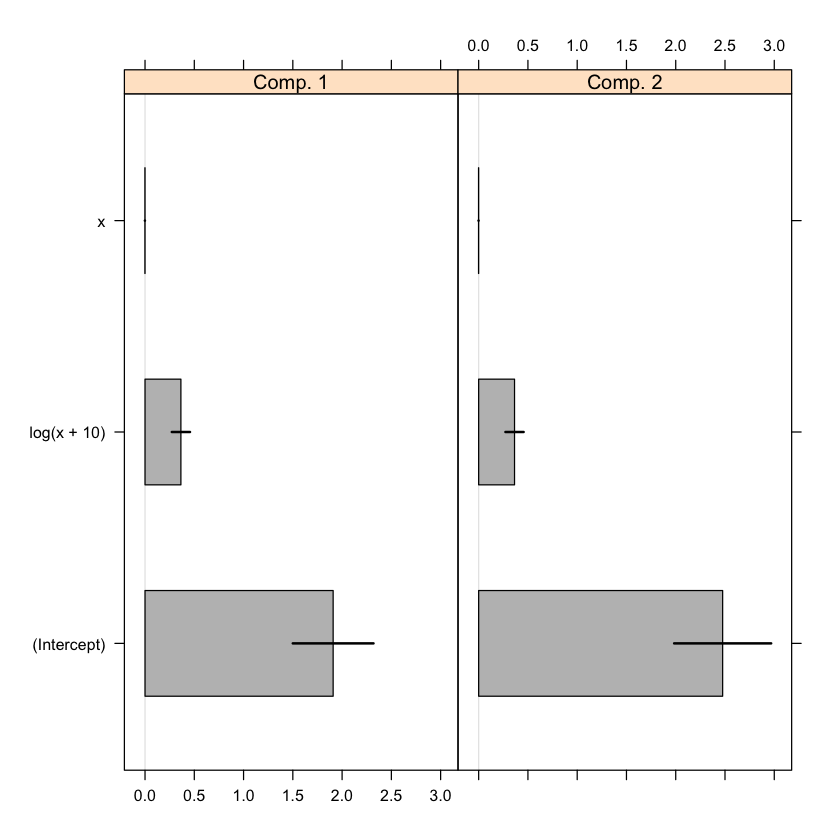

In [42]:
plot(refit(salmonMix))

# Bregfix

In [43]:
data(BregFix)

In [44]:
set.seed(4)

In [45]:
Conc <- FLXmultinom(~w)

In [46]:
Model.1 <- FLXglm(~x, family = "binomial")

In [47]:
Fitted.1 <- stepFlexmix(cbind(yes, no) ~ 1, data = BregFix,  model = Model.1, k = 3, concomitant = Conc, nrep = 5)

3 : * * * * *


In [49]:
Model.2 <- FLXglmFix(~1, nested = list(formula = c(~x,  ~0), k = c(2, 1)), family = "binomial")

In [52]:
Fitted.2 <- flexmix(cbind(yes, no) ~ 1, data = BregFix,  model = Model.2, concomitant = Conc, cluster = posterior(Fitted.1))


In [53]:
summary(refit(Fitted.2))


$Comp.1
            Estimate Std. Error z value  Pr(>|z|)    
x           1.612554   0.102439  15.742 < 2.2e-16 ***
(Intercept) 0.987078   0.066811  14.774 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

$Comp.2
            Estimate Std. Error z value  Pr(>|z|)    
x            1.61255    0.10244  15.742 < 2.2e-16 ***
(Intercept)  4.50108    0.25748  17.481 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

$Comp.3
            Estimate Std. Error z value  Pr(>|z|)    
(Intercept) -3.35554    0.18704  -17.94 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

